# Проект по теме машинное обучение в бизнесе

## Описание проекта:
Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину. 
Шаги для выбора локации обычно такие:
В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
Строят модель для предсказания объёма запасов в новых скважинах;
Выбирают скважины с самыми высокими оценками значений;
Определяют регион с максимальной суммарной прибылью отобранных скважин.
Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

## Шаги решения  
Шаг 1. Загрузка данных и подготовка данных  
Шаг 2. Обучение и проврека модели для каждого региона  
Шаг 3. Подготовка к расчёту прибыли  
Шаг 4. Создание функции для расчета прибыли по выбранным скважинам и предсказаниям модели  
Шаг 5. Подсчет рисков и прибыли для каждого региона  
Выводы

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from phik import phik_matrix
from phik.report import plot_correlation_matrix

# Шаг 1. Загрузка данных и подготовка данных

In [3]:
geo_data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv', sep=',')
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv', sep=',')
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
geo_data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv', sep=',')
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


__1.Проверим правильность типов данных и соблюдения змеиного стиля для каждого столбца__

In [6]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Ошибок типов и стиле названий в данных нет

__2. Обработка пропусков__

In [9]:
def check_missing_values(df):
    for column in df.columns:
        missing_values_count = df[column].isnull().sum()
        print(f"Столбец '{column}': {missing_values_count} пропусков")

In [25]:
check_missing_values(geo_data_0)

Столбец 'id': 0 пропусков
Столбец 'f0': 0 пропусков
Столбец 'f1': 0 пропусков
Столбец 'f2': 0 пропусков
Столбец 'product': 0 пропусков


In [26]:
check_missing_values(geo_data_1)

Столбец 'id': 0 пропусков
Столбец 'f0': 0 пропусков
Столбец 'f1': 0 пропусков
Столбец 'f2': 0 пропусков
Столбец 'product': 0 пропусков


In [27]:
check_missing_values(geo_data_2)

Столбец 'id': 0 пропусков
Столбец 'f0': 0 пропусков
Столбец 'f1': 0 пропусков
Столбец 'f2': 0 пропусков
Столбец 'product': 0 пропусков


Пропусков в данных нет

__3. Проврека явных и неявных дубликатов__

Если локации имеют два различных индекса, то это две разные локации, возможно даже с одинаковыми остальными показателями, проверим не повторяются ли индексы в датафреймах

In [28]:
duplicates_0 = geo_data_0['id'].duplicated()

duplicate_rows_0 = geo_data_0[duplicates_0]
print(duplicate_rows_0)

          id        f0        f1         f2     product
7530   HZww2  1.061194 -0.373969  10.430210  158.828695
41724  bxg6G -0.823752  0.546319   3.630479   93.007798
51970  A5aEY -0.180335  0.935548  -2.094773   33.020205
63593  QcMuo  0.635635 -0.473422   0.862670   64.578675
66136  74z30  1.084962 -0.312358   6.990771  127.643327
69163  AGS9W -0.933795  0.116194  -3.655896   19.230453
75715  Tdehs  0.112079  0.430296   3.218993   60.964018
90815  fiKDv  0.049883  0.841313   6.394613  137.346586
92341  TtcGQ  0.110711  1.022689   0.911381  101.318008
97785  bsk9y  0.378429  0.005837   0.160827  160.637302


In [29]:
duplicates_1 = geo_data_1['id'].duplicated()

duplicate_rows_1 = geo_data_1[duplicates_1]
display(duplicate_rows_1)

,id,f0,f1,f2,product
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


In [30]:
duplicates_2 = geo_data_2['id'].duplicated()

duplicate_rows_2 = geo_data_2[duplicates_2]
display(duplicate_rows_2)

,id,f0,f1,f2,product
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


Обнраружили 10, 4 и 4 дуюликата в трех датафреймах соответственно, удалим их

In [31]:
geo_data_0.drop_duplicates(subset='id', inplace=True)
geo_data_1.drop_duplicates(subset='id', inplace=True)
geo_data_2.drop_duplicates(subset='id', inplace=True)

В этом пугкте мы удалили дубликаты строк по столбцу id

__4. Исследовательский анализ__

In [32]:
def visualize_dataframe(dataframe):
    for column in dataframe.columns:
        column_type = dataframe[column].dtype

        if column_type in ['int64', 'float64']:
            fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

            dataframe[column].plot.hist(bins=25, ax=axes[0])
            axes[0].set_title(f'{column} - Гистограмма')
            axes[0].set_xlabel(column)
            axes[0].set_ylabel('Частота')

            sns.boxplot(x=dataframe[column], ax=axes[1])
            axes[1].set_title(f'{column} - Boxplot')
            axes[1].set_xlabel(column)

            plt.show()
            
            print(dataframe[column].describe())

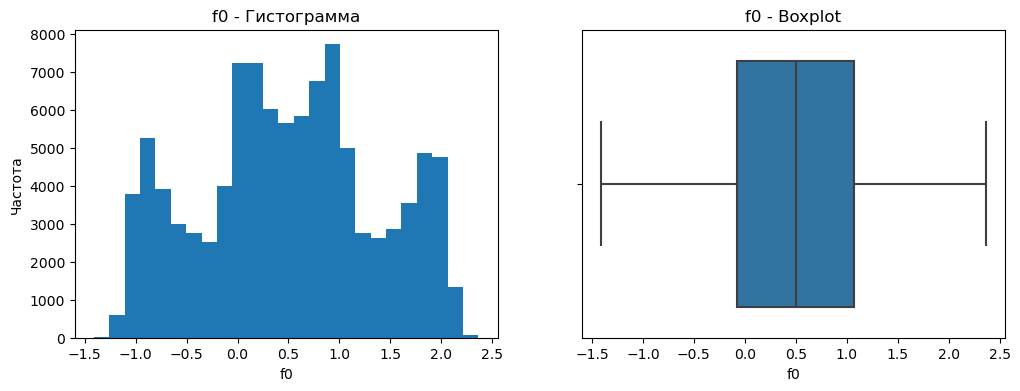

count    99990.000000
mean         0.500454
std          0.871844
min         -1.408605
25%         -0.072572
50%          0.502405
75%          1.073626
max          2.362331
Name: f0, dtype: float64


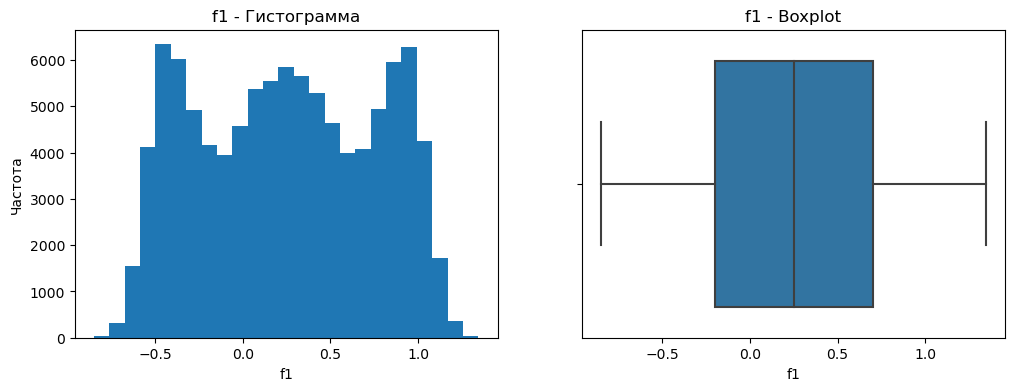

count    99990.000000
mean         0.250141
std          0.504430
min         -0.848218
25%         -0.200877
50%          0.250252
75%          0.700640
max          1.343769
Name: f1, dtype: float64


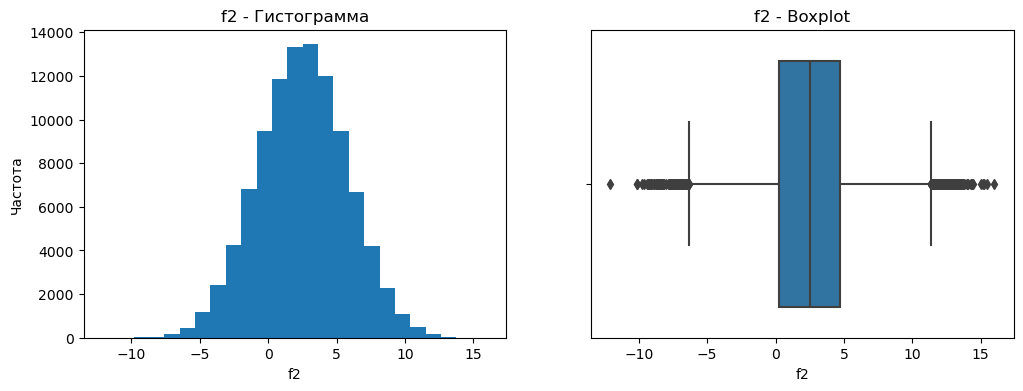

count    99990.000000
mean         2.502629
std          3.248149
min        -12.088328
25%          0.287784
50%          2.515969
75%          4.715035
max         16.003790
Name: f2, dtype: float64


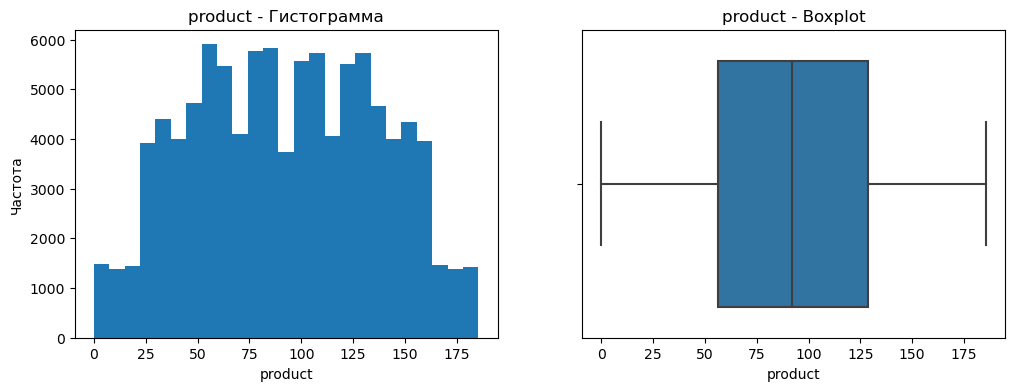

count    99990.000000
mean        92.499684
std         44.288304
min          0.000000
25%         56.497069
50%         91.847928
75%        128.563699
max        185.364347
Name: product, dtype: float64


In [33]:
visualize_dataframe(geo_data_0)

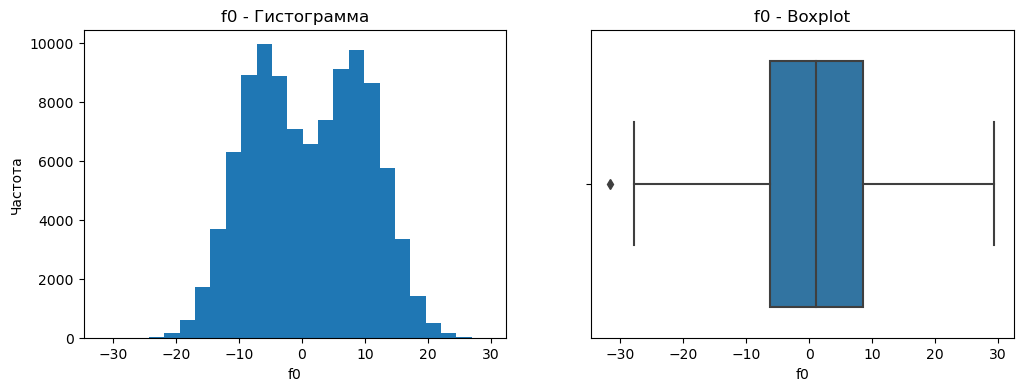

count    99996.000000
mean         1.141209
std          8.965815
min        -31.609576
25%         -6.298551
50%          1.153055
75%          8.620964
max         29.421755
Name: f0, dtype: float64


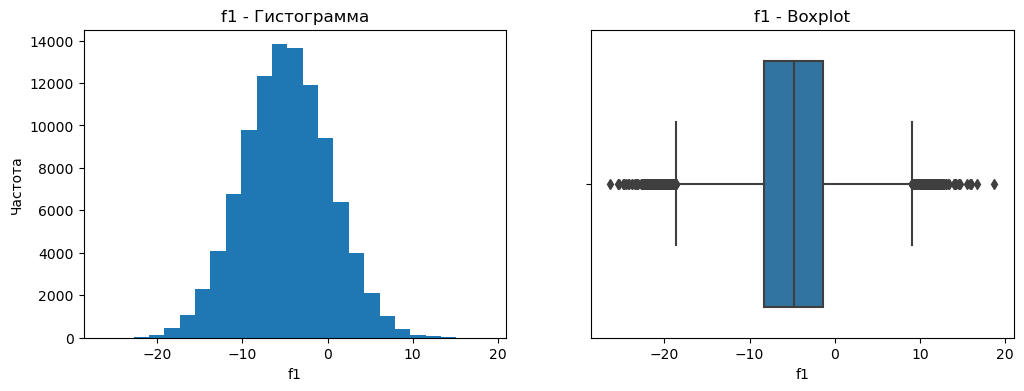

count    99996.000000
mean        -4.796608
std          5.119906
min        -26.358598
25%         -8.267985
50%         -4.813172
75%         -1.332816
max         18.734063
Name: f1, dtype: float64


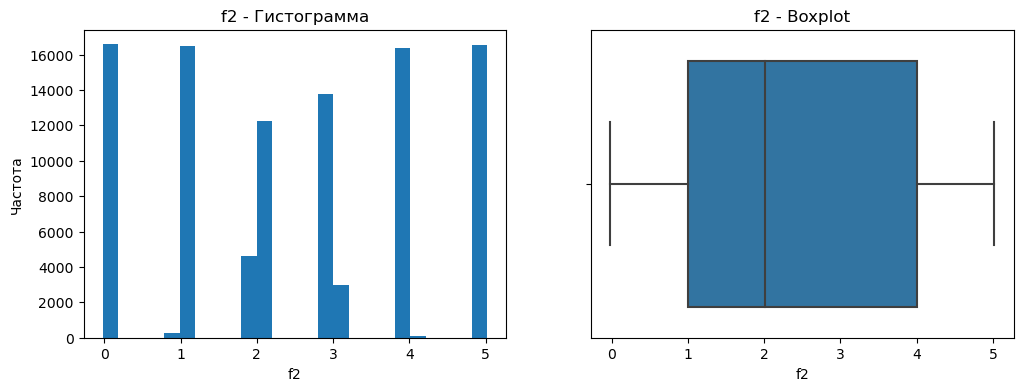

count    99996.000000
mean         2.494501
std          1.703579
min         -0.018144
25%          1.000021
50%          2.011475
75%          3.999904
max          5.019721
Name: f2, dtype: float64


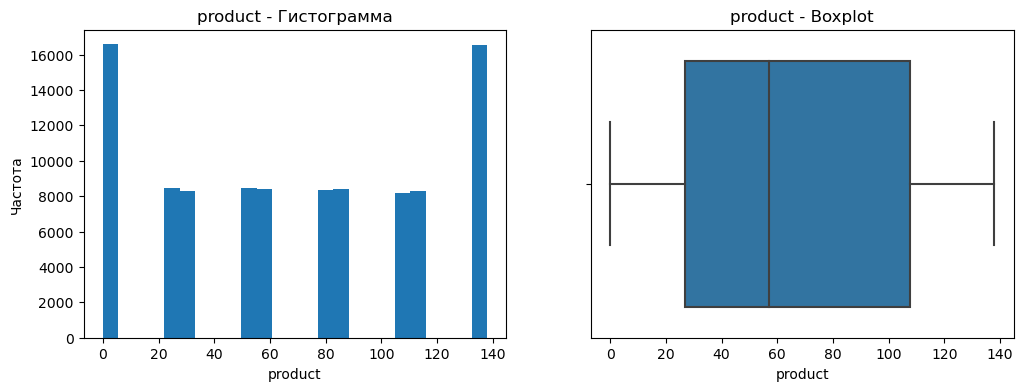

count    99996.000000
mean        68.823916
std         45.944663
min          0.000000
25%         26.953261
50%         57.085625
75%        107.813044
max        137.945408
Name: product, dtype: float64


In [34]:
visualize_dataframe(geo_data_1)

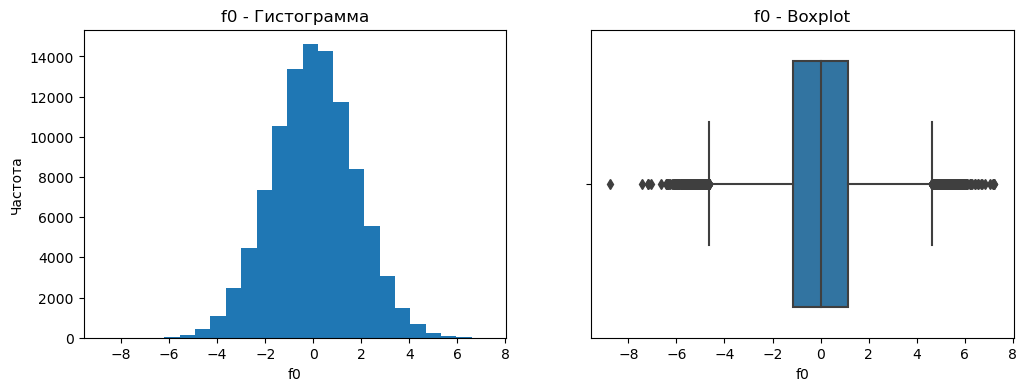

count    99996.000000
mean         0.002002
std          1.732052
min         -8.760004
25%         -1.162328
50%          0.009424
75%          1.158477
max          7.238262
Name: f0, dtype: float64


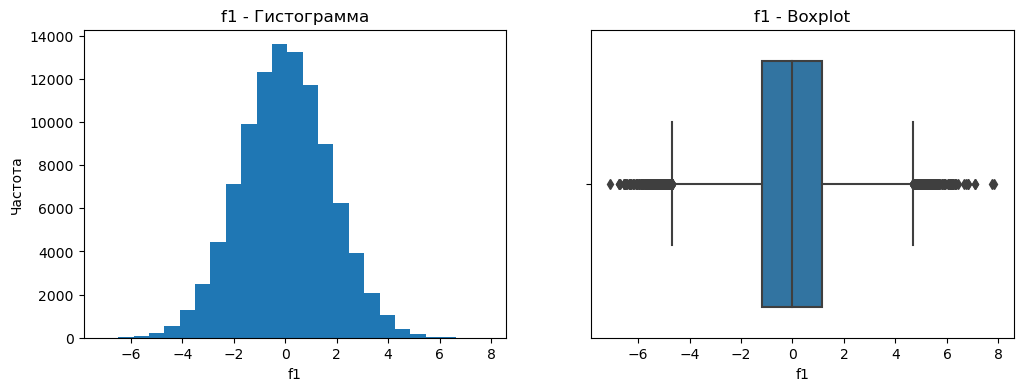

count    99996.000000
mean        -0.002159
std          1.730397
min         -7.084020
25%         -1.174841
50%         -0.009661
75%          1.163523
max          7.844801
Name: f1, dtype: float64


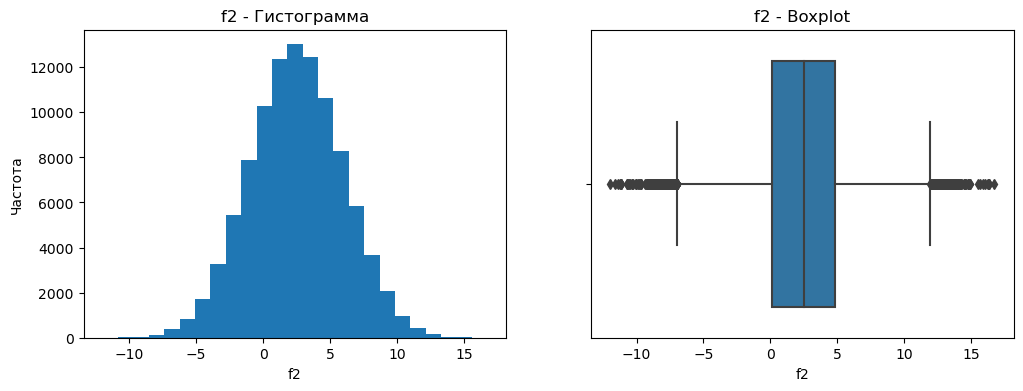

count    99996.000000
mean         2.495084
std          3.473482
min        -11.970335
25%          0.130269
50%          2.484236
75%          4.858720
max         16.739402
Name: f2, dtype: float64


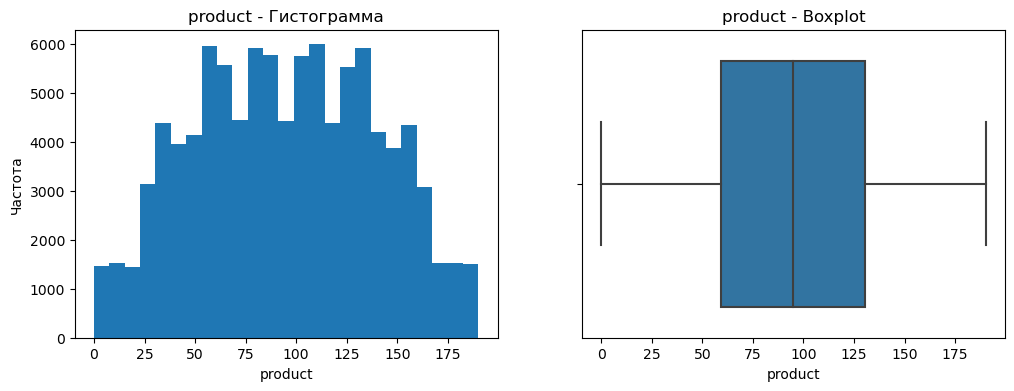

count    99996.000000
mean        94.998342
std         44.749573
min          0.000000
25%         59.450028
50%         94.925026
75%        130.586815
max        190.029838
Name: product, dtype: float64


In [35]:
visualize_dataframe(geo_data_2)

Удалим столбец id из датафрейма:

In [36]:
dict_0 = geo_data_0[['id']].to_dict('index')
dict_1 = geo_data_1[['id']].to_dict('index')
dict_2 = geo_data_2[['id']].to_dict('index')

In [37]:
for dataset in [geo_data_0, geo_data_1, geo_data_2]:
    dataset.drop(columns=['id'],axis=1, inplace=True)

Выбросов не найдено  
Обратим внимание на то, что признаки для региона номер 1 категоризованы 

__Вывод:__ В этом разаделе мы убедились в том, что пропусков в данных нет, также как и выбросов, формат данных нормальный, а также на этом шаге мы удалили дубликаты


interval columns not set, guessing: ['f1', 'f2', 'product']


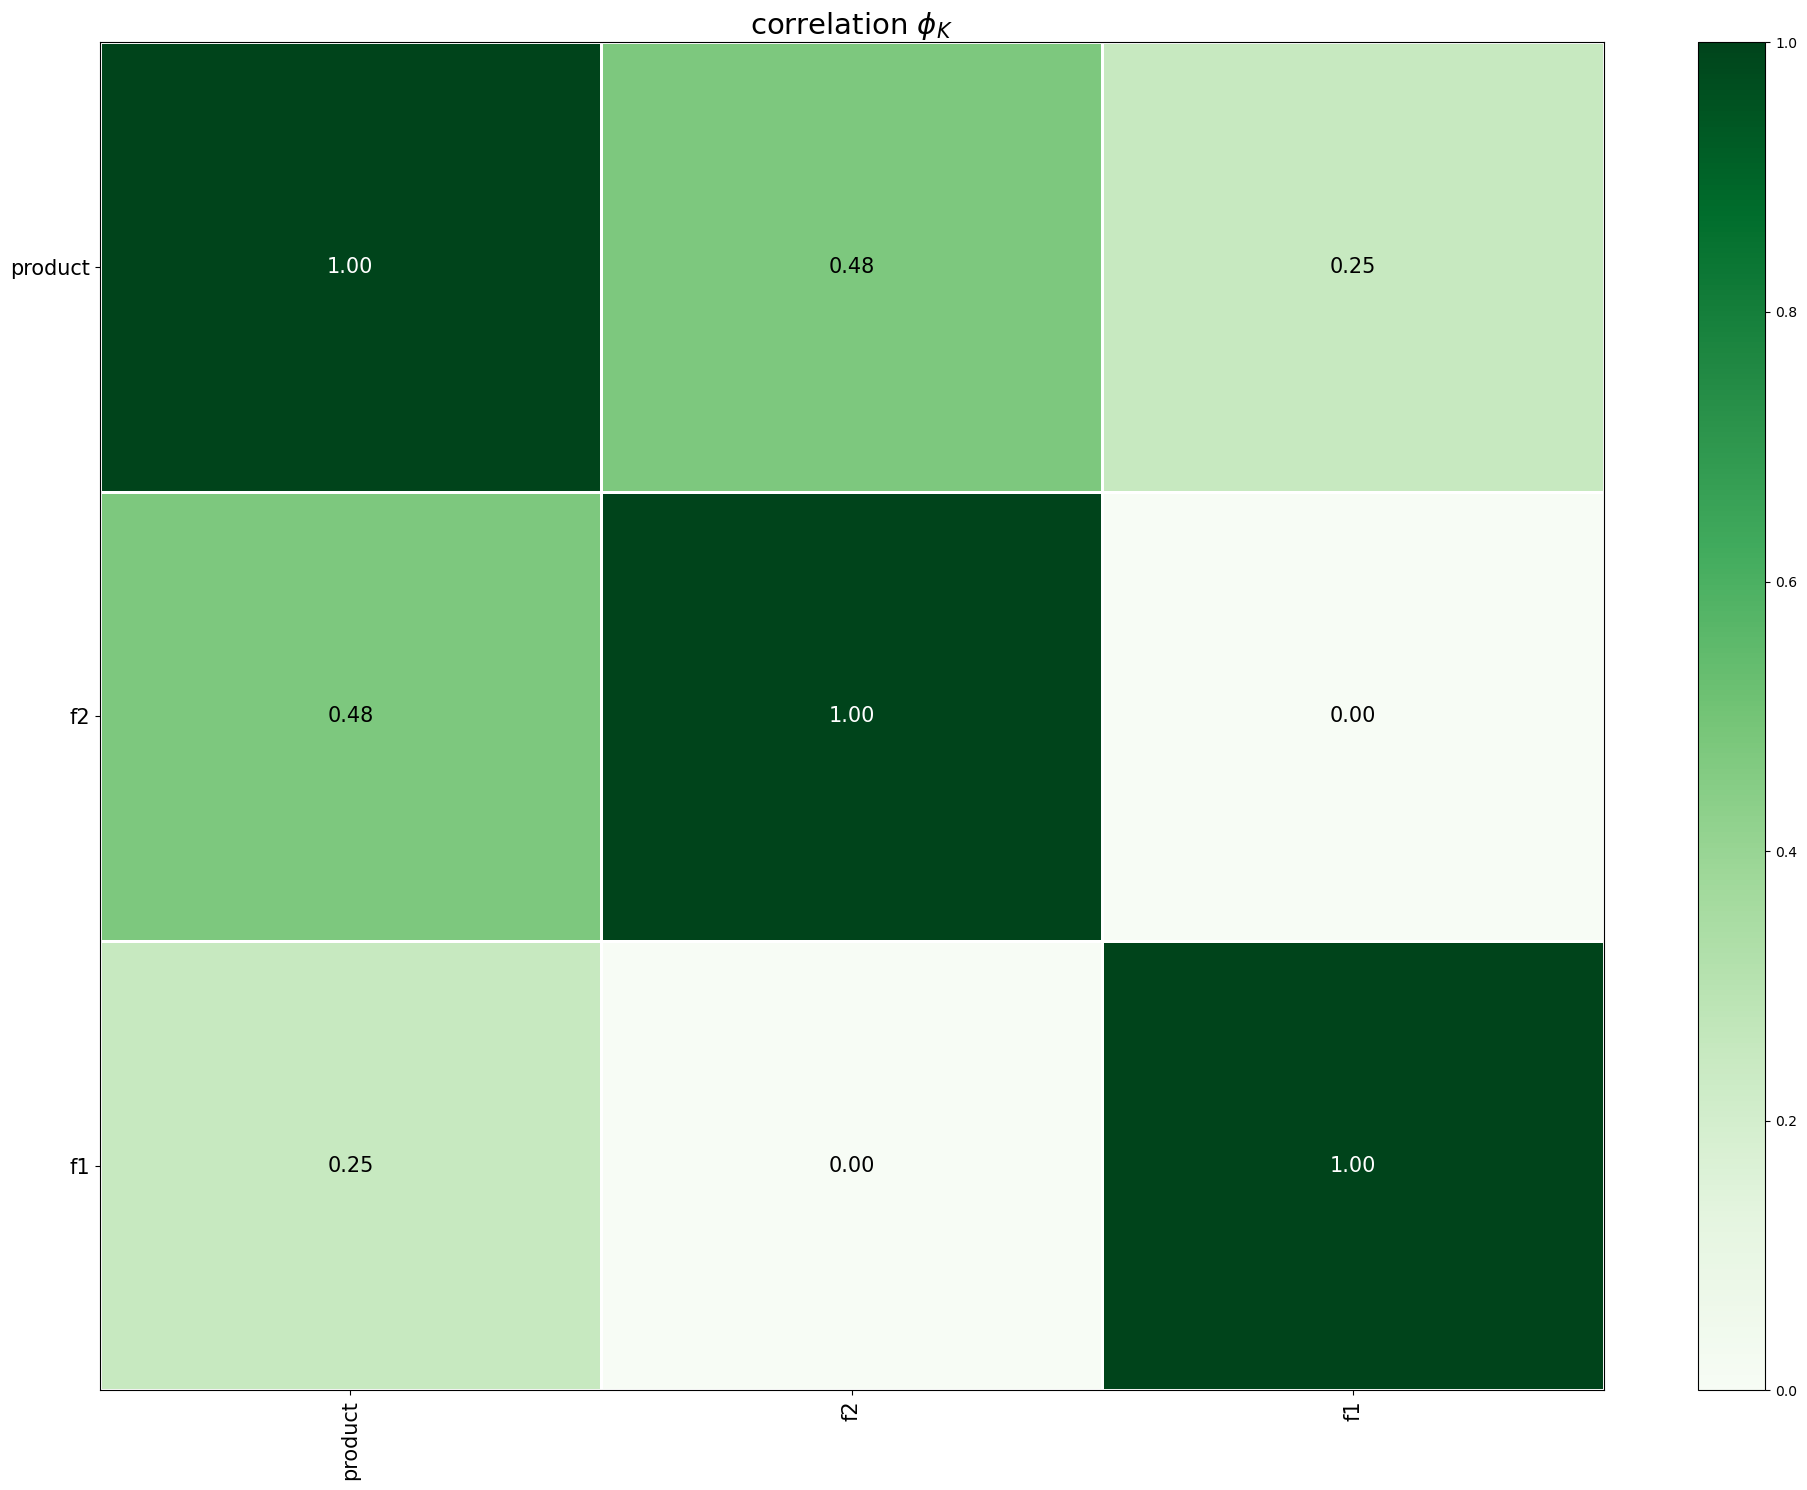

In [39]:

phik_overview = phik_matrix(geo_data_0.iloc[:, 1:]) 

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

# Шаг 2. Обучение и проврека модели для каждого региона

Напишем функцию, которая смогла бы:  
    1)разбить данные на обучающую и валидационную выюорки в соотношении 75:25  
    2)Обучить модель и сделать предсказания на валидационной выборке  
    3)Сохранить предсказания и правильные ответы на валидационной выборке
    4)Напечаталь на экране средний запас предсказанного сырья и RMSE модели

In [189]:
def model_for_region(df):
    features = df.drop(['product'],axis = 1) 
    target = df['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=91)
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    predictions = model.predict(features_valid)
    
    mse = mean_squared_error(target_valid, predictions)
    rmse = mse ** 0.5
    
    target_valid = target_valid.reset_index(drop=True)
    return [predictions, rmse, target_valid]

In [190]:
predictions_0, rmse_0, target_valid_0 = model_for_region(geo_data_0)
print('Данные для региона номер 0')
print('RMSE равно', rmse_0)
print('Предсказанный средний запас равен', predictions_0.mean())
print('Реальный средний запас равен', target_valid_0.mean())

Данные для региона номер 0
RMSE равно 37.719424466783465
Предсказанный средний запас равен 92.35151779085285
Реальный средний запас равен 92.01056368526022


In [191]:
predictions_1, rmse_1, target_valid_1 = model_for_region(geo_data_1)
print('Данные для региона номер 1')
print('RMSE равно', rmse_1)
print('Предсказанный средний запас равен', predictions_1.mean())
print('Реальный средний запас равен', target_valid_1.mean())

Данные для региона номер 1
RMSE равно 0.8933310134013565
Предсказанный средний запас равен 68.66652481695475
Реальный средний запас равен 68.66468350475492


In [192]:
predictions_2, rmse_2, target_valid_2 = model_for_region(geo_data_2)
print('Данные для региона номер 2')
print('RMSE равно', rmse_2)
print('Предсказанный средний запас равен', predictions_2.mean())
print('Реальный средний запас равен', target_valid_2.mean())

Данные для региона номер 2
RMSE равно 39.98326101627197
Предсказанный средний запас равен 95.10811032646107
Реальный средний запас равен 95.09536650605487


__Вывод:__
Видим, что метрика RMSE оказалась лучшей в первом регионе, хотя нужно не забывать о том, что именно там данные были категоризованы, а также этот в этом регионе сильно меньше запасов по сравнению с 0 и 2     

# Шаг 3. Подготовка к расчёту прибыли

В этом шаге мы:  
1)Cохраним все ключевые значения для расчетов в отдельных переменных
2)Расчитаем достаточный объем сырья для безубыточной разработки новой скважины. Сравним полученный объем сырья со средним запасом в каждом регионе  
3)Напишем вывод

In [193]:
budget = 10000000000
total_points = 500
best_points = 200
income = 450000

In [194]:
print('Достаточный объем сырья для безубыточной разработки новой скважины равен', budget / incom / best_points, 
     'тыс.баррелей')

Достаточный объем сырья для безубыточной разработки новой скважины равен 111.11111111111111 тыс.баррелей


Во всех трех регионах средний реальный запас сырья меньше, чем необходимо для безубыточной разработки новвой скважины

__Вывод:__  
Средний объем сырья для безубыточной разработки скважины равен 111.1 тыс. баррелей, во всех трех регионах средний запас сырья меньше этого значения

# Шаг 4. Создание функции для расчета прибыли по выбранным скважинам и предсказаниям модели

В этом пункте нам нужно:  
1)Выбрать скважины с макисмальными значениями предсказаний  
2)Просуммировать целевое значение объема сырья, соответсвующее этим предсказаниям  
3)Рассчитать прибыль для полученного объема сырья  

In [195]:
def profit_calculate(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return (income * selected.sum() - budget)

In [196]:
print('Прибыль региона 0 равна', round(profit_calculate(target_valid_0, pd.Series(predictions_0),200) / 1000000, 3), 'млн') 

Прибыль региона 0 равна 3254.714 млн


In [197]:
print('Прибыль региона 1 равна', round(profit_calculate(target_valid_1, pd.Series(predictions_1),200) / 1000000, 3), 'млн') 

Прибыль региона 1 равна 2415.087 млн


In [198]:
print('Прибыль региона 2 равна', round(profit_calculate(target_valid_2, pd.Series(predictions_2),200) / 1000000, 3), 'млн') 

Прибыль региона 2 равна 2678.799 млн


__Вывод__  
Регионом с самой большой выручкой по лучшим 200 скважинам является регион номер 0

# Шаг 5. Подсчет рисков и прибыли для каждого региона

В этом шаге нам необходимо:  
1)Применить технику Bootstrap с 1000 выборок, чтобы найти распределение приыбли  
2)Найти среднюю прибыль, 95%-й доверительный интервал и риск убытков  
3)Написать выводы  

In [199]:
state = np.random.RandomState(1000)
def bootstrap(target,probabilities, reg):
    values = []
    for i in range(1000):
        target_subsample = target.sample(500, replace = True, random_state = state)
        probs_subsample = probabilities[target_subsample.index] 
        values.append(profit_calculate(target_subsample, probs_subsample, 200))

    values = pd.Series(values)
    lower = values.quantile(0.025)
    chance_loss = (values < 0).mean()
    interval = (values.quantile(0.025), values.quantile(0.975))
    mean = values.mean()
    print(reg)
    print('Средняя прибыль:млн',mean/1000000, 'млн')
    print('Доверительный интервал среднего',interval)
    print('2.5%-квантиль:',lower)
    print('Риск:', chance_loss*100, '%')
    
bootstrap(target_valid_0, pd.Series(predictions_0), 'Регион №0')
bootstrap(target_valid_1, pd.Series(predictions_1), 'Регион №1')
bootstrap(target_valid_2, pd.Series(predictions_2), 'Регион №2')

Регион №0
Средняя прибыль:млн 363.26039858623733 млн
Доверительный интервал среднего (-177254517.41495124, 908058420.1305163)
2.5%-квантиль: -177254517.41495124
Риск: 8.799999999999999 %
Регион №1
Средняя прибыль:млн 496.76714995027453 млн
Доверительный интервал среднего (63914343.672640465, 962879202.210385)
2.5%-квантиль: 63914343.672640465
Риск: 1.4000000000000001 %
Регион №2
Средняя прибыль:млн 338.862152267936 млн
Доверительный интервал среднего (-157745123.45753804, 857756250.6201882)
2.5%-квантиль: -157745123.45753804
Риск: 10.6 %


__Вывод__  
В регионе 1 ожидается наибольшая возможная прибыль в размере 496.8 млн, риск потерь также минимальный в регионе номер 1, он составляет всего 1.4%

# Вывод

В этом проекте мы определили регион, где будем бурить новую скважину
В начале мы провели предобработку и исследовательский анализ данных, данные, за некоторыми исключениями, оказались нормальными. После чего мы построили линейную модель для пресказания объемов нефти в скважинах.
Затем мы выполнили процедуру бутстрэпа и нашли 95%-й доверительный интервал и риск убытков. Наиболее перспективными для разработки является регион 1, именно в этом регионе ожидается наибольшая прибыль и минимальный риск потерь